In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
m1, cov1, = [1,5], [[1,0.1], [0.1, 1]]

m2, cov2, = [4,6], [[1,0.1], [0.1, 1]]

dist1 = np.random.multivariate_normal(m1, cov1, 500)
dist2 = np.random.multivariate_normal(m2, cov2, 500)

print(dist1.shape, dist2.shape)

(500, 2) (500, 2)


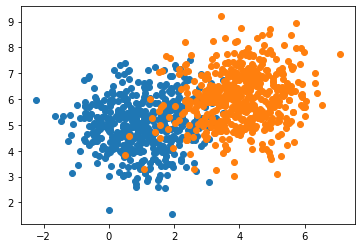

In [3]:
plt.scatter(dist1[:, 0], dist1[:, 1])

plt.scatter(dist2[:, 0], dist2[:,1])

plt.show()

In [4]:
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1
print(data.shape)

(1000, 3)


In [5]:
data

array([[0.95267631, 5.07437051, 0.        ],
       [1.98847118, 5.14866398, 0.        ],
       [2.8468716 , 5.26782477, 0.        ],
       ...,
       [5.23934928, 5.39614878, 1.        ],
       [3.5580442 , 8.35533702, 1.        ],
       [4.37735865, 5.25787462, 1.        ]])

In [6]:
np.random.shuffle(data)
data[:10]

array([[ 5.18284001,  6.46501317,  1.        ],
       [ 0.63499074,  4.6511571 ,  0.        ],
       [ 3.93591326,  6.20770632,  1.        ],
       [ 0.69861235,  5.15490396,  0.        ],
       [ 3.39214683,  6.42776732,  1.        ],
       [ 5.93234852,  5.68170801,  1.        ],
       [ 2.3203292 ,  7.05522666,  1.        ],
       [ 4.50373344,  4.97224312,  1.        ],
       [-1.16247504,  4.61669503,  0.        ],
       [ 3.00809176,  5.01855947,  0.        ]])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(data[:, :2], data[:, -1])

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(750, 2) (750,)
(250, 2) (250,)


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-1*z))

In [11]:
def hypothesis(X, W, b):
    h = (X*W).sum() + b
    return sigmoid(h)

In [12]:
def log_likelihood(X, W,b, y):
    total = 0.0
    m = X.shape[0]
    for i in range(m):
        if y[i] == 0:
            total += np.log(1-hypothesis(X[i], W, b))
        else:
            total += np.log(hypothesis(X[i], W, b))
            
    total /=m 
    return total

In [13]:
def gradient_ascent(X, W, b, y, lr = 0.1):
    
    m = X.shape[0]
    gradW = np.zeros(2)
    gradb = 0.0
    
    for i in range(m):
        gradW += (y[i] - hypothesis(X[i], W, b))*X[i]
        gradb += (y[i] - hypothesis(X[i], W, b))*1
        
        gradW /=m
        gradb /=m
        
        W += lr*gradW
        b += lr*gradb
        
        logs = log_likelihood(X, W, b, y)
    
    return W, b, logs

In [ ]:
W = np.array([0.5, 0.5])
b = 2.2
logs_list = []
for i in range(500):
    print(i)
    W, b, logs = gradient_ascent(xtrain, W, b, ytrain)
    logs_list.append(logs)

print(W)
print(b)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


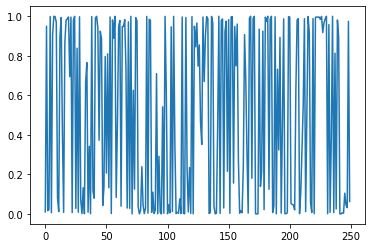

In [18]:
plt.plot(y[:, 0])
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [12]:
lr.score(xtest, ytest)

0.932

In [13]:
lr.predict(xtest)

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [16]:
y = lr.predict_proba(xtest)

In [15]:
lr.predict_log_proba(xtest)

array([[-4.56434615e+00, -1.04713213e-02],
       [-5.12138578e-02, -2.99724277e+00],
       [-4.08605638e+00, -1.69481897e-02],
       [-3.85305590e+00, -2.14430753e-02],
       [-1.49533258e-03, -6.50615421e+00],
       [-5.13323190e+00, -5.91492834e-03],
       [-9.54597039e-02, -2.39640126e+00],
       [-4.23855745e-04, -7.76632930e+00],
       [-1.69745878e-03, -6.37947159e+00],
       [-3.10003566e-02, -3.48921671e+00],
       [-2.50445115e+00, -8.52534011e-02],
       [-4.46765264e+00, -1.15405551e-02],
       [-1.08420459e-01, -2.27545896e+00],
       [-6.88994881e-03, -4.98113462e+00],
       [-8.88013671e-01, -5.30131218e-01],
       [-4.86737960e+00, -7.72324658e-03],
       [-1.44057114e-01, -2.00870946e+00],
       [-2.01138081e-02, -3.91638878e+00],
       [-1.34921816e-02, -4.31238341e+00],
       [-3.98842326e-03, -5.52635285e+00],
       [-3.65385678e-01, -1.18393807e+00],
       [-4.36269607e-03, -5.43684560e+00],
       [-4.98114615e+00, -6.88986911e-03],
       [-2.